In [1]:
import sys
sys.path.append("..") ## resetting the path to the parent directory

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, load_model

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from sklearn.metrics import classification_report

In [5]:
import numpy as np
import pandas as pd

In [6]:
model = load_model('../models/vgg_v3_partial_unfreeze.h5')
#model = load_model('../models/little_model.h5')

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 1024)              25691136  
_________________________________________________________________
predictions (Dense)          (None, 12)                12300     
Total params: 40,418,124
Trainable params: 32,782,860
Non-trainable params: 7,635,264
_________________________________________________________________


In [8]:
eval_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
dim = 224

In [11]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [12]:
batch_size=32
train_generator = train_datagen.flow_from_directory(
        '../data/train_folder',  # this is the target directory
        target_size=(dim, dim),  # all images will be resized to 150x150
        batch_size=batch_size,
        color_mode="rgb",
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

Found 10285 images belonging to 12 classes.


In [13]:
evaluate_generator = eval_datagen.flow_from_directory(
        '../data/validation_folder',
        target_size=(dim, dim),
        batch_size=1,
        seed=42,
        shuffle=False,
        class_mode='categorical')

Found 1140 images belonging to 12 classes.


In [14]:
test_generator = test_datagen.flow_from_directory(
    directory='../data/holdout_folder',
    target_size=(dim, dim),
    color_mode="rgb",
    batch_size=1,
    shuffle=False,
    class_mode=None,
    seed=42)

Found 1371 images belonging to 12 classes.


In [15]:
eval_loss, eval_acc = model.evaluate(evaluate_generator, verbose=0)

In [16]:
print(f'The validation accuracy is: {eval_acc*100:.2f}%')

The validation accuracy is: 83.07%


In [17]:
pred = model.predict(test_generator,verbose=1)

1371/1371 [==============================] - 44s 32ms/step


In [18]:
y_pred = np.argmax(pred, axis=1)

In [19]:
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

In [20]:
report = classification_report(y_true, y_pred, target_names=class_labels)

In [21]:
print(report)

                 precision    recall  f1-score   support

 Antoninus Pius       0.85      0.90      0.87       123
  Constantine I       0.76      0.84      0.80       116
 Constantine II       0.76      0.65      0.70       129
 Constantius II       0.74      0.81      0.77       118
     Diocletian       0.87      0.82      0.84        92
       Galerius       0.76      0.79      0.78       114
      Gallienus       0.96      0.98      0.97       140
        Hadrian       0.81      0.84      0.83       102
       Licinius       0.85      0.82      0.84       120
Marcus Aurelius       0.91      0.83      0.87       116
       Maximian       0.77      0.80      0.78        88
         Trajan       0.95      0.92      0.94       113

       accuracy                           0.83      1371
      macro avg       0.83      0.83      0.83      1371
   weighted avg       0.84      0.83      0.83      1371



In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
test_generator.class_indices

{'Antoninus Pius': 0,
 'Constantine I': 1,
 'Constantine II': 2,
 'Constantius II': 3,
 'Diocletian': 4,
 'Galerius': 5,
 'Gallienus': 6,
 'Hadrian': 7,
 'Licinius': 8,
 'Marcus Aurelius': 9,
 'Maximian': 10,
 'Trajan': 11}

In [24]:
sl_y_true = {val:key for key,val in test_generator.class_indices.items()}

In [25]:
cm_y_true = [sl_y_true[val]for val in y_true]

In [26]:
cm_y_pred = [sl_y_true[val] for val in y_pred]

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay


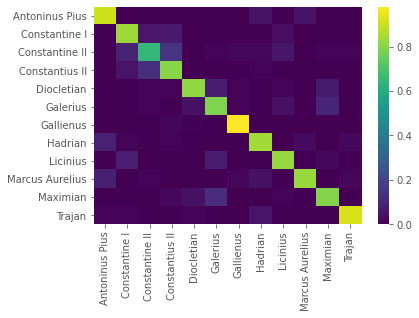

In [45]:
sns.heatmap(cm,cmap='viridis',ax=ax,xticklabels=class_labels, yticklabels=class_labels)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(cm_y_true,cm_y_pred)

array([[111,   0,   0,   0,   0,   0,   0,   6,   0,   6,   0,   0],
       [  0,  97,   7,   8,   0,   0,   0,   0,   4,   0,   0,   0],
       [  0,  12,  84,  19,   0,   1,   2,   2,   7,   0,   1,   1],
       [  0,   6,  16,  95,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   1,   1,  75,   7,   1,   0,   1,   0,   6,   0],
       [  0,   0,   1,   0,   5,  90,   1,   0,   5,   0,  12,   0],
       [  0,   0,   0,   2,   1,   0, 137,   0,   0,   0,   0,   0],
       [  9,   1,   0,   1,   0,   0,   0,  86,   0,   3,   0,   2],
       [  0,  10,   0,   0,   0,   9,   0,   0,  99,   0,   2,   0],
       [ 10,   0,   1,   0,   0,   0,   2,   5,   0,  96,   0,   2],
       [  0,   0,   0,   2,   4,  11,   0,   0,   1,   0,  70,   0],
       [  1,   1,   0,   0,   1,   0,   0,   6,   0,   0,   0, 104]])

In [39]:
cm = confusion_matrix(y_true,y_pred,normalize='true')
print(cm)

[[0.90243902 0.         0.         0.         0.         0.
  0.         0.04878049 0.         0.04878049 0.         0.        ]
 [0.         0.8362069  0.06034483 0.06896552 0.         0.
  0.         0.         0.03448276 0.         0.         0.        ]
 [0.         0.09302326 0.65116279 0.14728682 0.         0.00775194
  0.01550388 0.01550388 0.05426357 0.         0.00775194 0.00775194]
 [0.         0.05084746 0.13559322 0.80508475 0.         0.
  0.         0.00847458 0.         0.         0.         0.        ]
 [0.         0.         0.01086957 0.01086957 0.81521739 0.07608696
  0.01086957 0.         0.01086957 0.         0.06521739 0.        ]
 [0.         0.         0.00877193 0.         0.04385965 0.78947368
  0.00877193 0.         0.04385965 0.         0.10526316 0.        ]
 [0.         0.         0.         0.01428571 0.00714286 0.
  0.97857143 0.         0.         0.         0.         0.        ]
 [0.08823529 0.00980392 0.         0.00980392 0.         0.
  0.         

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


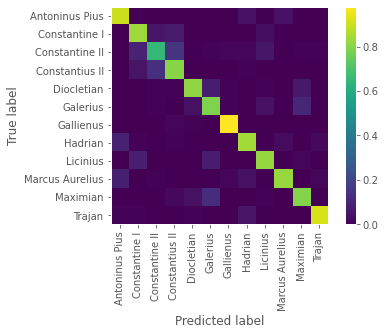

In [41]:
%load_ext autoreload
#Satutoreload 2

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

fig,ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_labels)
disp = disp.plot(include_values = False,ax=ax,xticks_rotation = 'vertical')
plt.grid(None) 
plt.show()

In [ ]:
%load_ext autoreload
#Satutoreload 2

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
sns.heatmap(cm_y_true, cm_y_pred.reshape(-1,1))

In [ ]:
cm_y_true.shape